In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#### Generate data

In [26]:
sample_size = 1000
x_min = 0
x_max = 100

x = np.random.randint(low=x_min, high=x_max, size=sample_size, dtype=int)
y = x + 20*np.random.randn(sample_size)

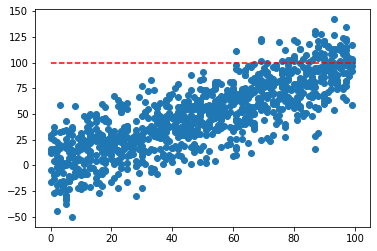

In [27]:
plt.scatter(x,y);
plt.hlines(y=x_max, xmin=x_min, xmax=x_max, colors='red', linestyles='dashed');

In [28]:
y = np.where(y<x_max, 0, 1)

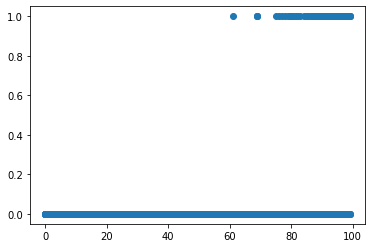

In [29]:
plt.scatter(x,y);

In [30]:
df = pd.DataFrame({"Age": x, "Action": y})

#### Explore data

In [31]:
df.head()

,Age,Action
0,40,0
1,21,0
2,59,0
3,9,0
4,13,0


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Age     1000 non-null   int64
 1   Action  1000 non-null   int64
dtypes: int64(2)
memory usage: 15.8 KB


In [33]:
# check imbalance
df['Action'].value_counts()

0    930
1     70
Name: Action, dtype: int64

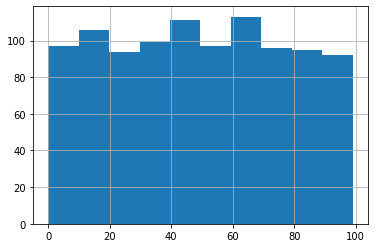

In [34]:
df['Age'].hist();

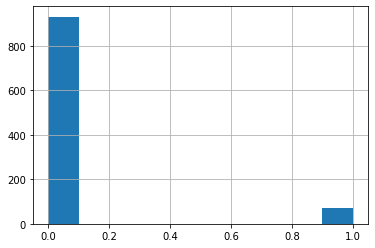

In [35]:
df['Action'].hist();

#### Train classification model

In [36]:
from sklearn.model_selection import  train_test_split
from sklearn.linear_model import LogisticRegression

In [37]:
X = df['Age'].to_numpy().reshape(-1,1)
y = df['Action'].to_numpy()

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [39]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

#### Test classification model

In [40]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [41]:
y_pred = classifier.predict(X_test)

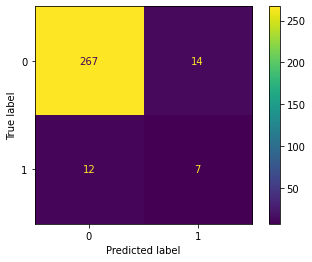

In [42]:
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

#### Model evaluation

In [43]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, roc_auc_score

In [44]:
result_df = pd.DataFrame(
    {
        "Accuracy": round(accuracy_score(y_test, y_pred), 4),
        "Recall": round(recall_score(y_test, y_pred), 4),
        "Precision": round(precision_score(y_test, y_pred), 4),
        "Roc_Auc": round(roc_auc_score(y_test, y_pred), 4),
    },
    index = ['Logistic classifier']
)

result_df

,Accuracy,Recall,Precision,Roc_Auc
Logistic classifier,0.9133,0.3684,0.3333,0.6593


#### Comparison with dummy classifier

The ZeroR (or Zero Rate) Classifier always classifies to the largest class– in other words, just trivially predicting the most-frequent class. For a two outcome model, it will be right more often than not by just going with the odds.

In [45]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)

y_pred_dummy = dummy_clf.predict(X_test)

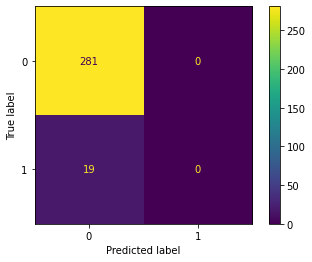

In [46]:
cm = confusion_matrix(y_test, y_pred_dummy)
ConfusionMatrixDisplay(cm).plot()

In [47]:
result_df = pd.DataFrame(
    {
        "Accuracy": round(accuracy_score(y_test, y_pred_dummy), 4),
        "Recall": round(recall_score(y_test, y_pred_dummy), 4),
        "Precision": round(precision_score(y_test, y_pred_dummy), 4),
        "Roc_Auc": round(roc_auc_score(y_test, y_pred_dummy), 4),
    },
    index = ['Dummy classifier']
)

result_df

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Accuracy,Recall,Precision,Roc_Auc
Dummy classifier,0.9367,0.0,0.0,0.5
